# FA & Clustering

## FA

* 이상치 처리
* 요인 수
* 클러스터 개수

## 데이터 전처리
1. 버전 관련 제거
2. 모두 동일한 값 제거
3. 값이 2개인 경우 제거
4. 범주형 변수 제거

In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 데이터 가져오기

file_dir = '../data/'
file_name = 'internal_metrics5.csv'

internalMetrics_df = pd.read_csv(file_dir+file_name)

### 1. 버전 환경 관련 제거
* redis_version
* redis_builid_id
* os
* gcc_version
* Executable
* config_file
* tcp_port
* run_id
* process_id

In [5]:
# 버전, 환경 관련 변수
var1_noRel = [
    'redis_version', 
    'redis_build_id', 
    'os',
    'gcc_version',
    'executable',
    'config_file',
    'tcp_port',
    'run_id',
    'process_id',
    'master_replid'
]

In [6]:
# 버전, 환경 관련 변수 확인
var1_noRel

['redis_version',
 'redis_build_id',
 'os',
 'gcc_version',
 'executable',
 'config_file',
 'tcp_port',
 'run_id',
 'process_id',
 'master_replid']

In [7]:
# 변수 제거 
internalMetrics_df = internalMetrics_df.drop(columns = var1_noRel, axis=0)

In [8]:
len(internalMetrics_df.columns)

114

In [9]:
# 변수 제거 데이터프레임 확인
internalMetrics_df.head()

,redis_git_sha1,redis_git_dirty,redis_mode,arch_bits,multiplexing_api,atomicvar_api,uptime_in_seconds,uptime_in_days,hz,configured_hz,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,0,0,standalone,64,epoll,atomic-builtin,28,0,11,11,...,0,0,11.497908,4.884932,0.0,0.0,0,249666,0,0
1,0,0,standalone,64,epoll,atomic-builtin,28,0,34,34,...,0,0,11.594370,4.937450,0.0,0.0,0,249666,0,0
2,0,0,standalone,64,epoll,atomic-builtin,28,0,3,3,...,0,0,11.626611,4.774636,0.0,0.0,0,249666,0,0
3,0,0,standalone,64,epoll,atomic-builtin,28,0,26,26,...,0,0,11.527698,5.038324,0.0,0.0,0,249666,0,0
4,0,0,standalone,64,epoll,atomic-builtin,28,0,22,22,...,0,0,11.512275,4.859807,0.0,0.0,0,249666,0,0


### 2. 모두 동일한 값
fa의 경우 모두 동일한 값이 존재하면 실행 시 오류 발생

In [10]:
len(internalMetrics_df.columns)

114

In [11]:
def find_var_count(df, count):
    var = []
    
    for metric in df:
        if len(df[metric].unique()) == count:
            var.append(metric)
    return var

In [12]:
# 모두 동일한 값 가지고 있는 변수 리스트
# sameValue_var = []

# for metric in internalMetrics_df:
#     if len(internalMetrics_df[metric].unique()) == 1:
#         sameValue_var.append(metric)

# len(sameValue_var)

sameValue = find_var_count(internalMetrics_df, 1)

# 동일 값 변수 제거
internalMetrics_df = internalMetrics_df.drop(columns = sameValue, axis = 0)

### 3. 값이 2개인 경우 제거

In [13]:
# 값이 2개인 경우
twoVal_var = find_var_count(internalMetrics_df, 2)

internalMetrics_df = internalMetrics_df.drop(columns = twoVal_var, axis = 0)

In [14]:
len(internalMetrics_df.columns)

32

In [15]:
internalMetrics_df.dtypes

uptime_in_seconds              int64
hz                             int64
configured_hz                  int64
lru_clock                      int64
used_memory                    int64
used_memory_rss                int64
used_memory_rss_human        float64
used_memory_peak               int64
used_memory_overhead           int64
used_memory_dataset            int64
allocator_allocated            int64
allocator_active               int64
allocator_resident             int64
maxmemory                      int64
maxmemory_human              float64
maxmemory_policy              object
allocator_frag_bytes           int64
allocator_rss_ratio          float64
allocator_rss_bytes            int64
rss_overhead_ratio           float64
rss_overhead_bytes             int64
mem_fragmentation_ratio      float64
mem_fragmentation_bytes        int64
rdb_last_save_time             int64
instantaneous_ops_per_sec      int64
total_net_output_bytes         int64
instantaneous_input_kbps     float64
i

### 4. 범주형 변수 제거

In [16]:
# maxmemory_policy만 제거해보고 해보기
internalMetrics_df = internalMetrics_df.drop(columns = 'maxmemory_policy', axis = 0)

In [17]:
import pandas as pd

In [18]:
internalMetrics_df = pd.get_dummies(internalMetrics_df)
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_overhead,used_memory_dataset,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,28,11,11,3668563,38644392,42024960,40.08,38704616,12615400,26028992,...,3402352,1631058487,16060,5048972,1121.38,79.90,742,499258,11.497908,4.884932
1,28,34,34,3668604,38644392,42024960,40.08,38704632,12615400,26028992,...,3402352,1631058528,28139,5049038,1964.82,139.72,743,499257,11.594370,4.937450
2,28,3,3,3668639,38644392,41799680,39.86,38704616,12615400,26028992,...,3177072,1631058563,39006,5049170,2723.66,193.47,745,499255,11.626611,4.774636
3,28,26,26,3668673,38644392,42041344,40.09,38704616,12615400,26028992,...,3418736,1631058597,16262,5049038,1135.51,81.10,743,499257,11.527698,5.038324
4,28,22,22,3668707,38644392,42049536,40.10,38704616,12615400,26028992,...,3426928,1631058631,16797,5049104,1172.88,83.55,744,499256,11.512275,4.859807


In [19]:
internalMetrics_df.dtypes

uptime_in_seconds              int64
hz                             int64
configured_hz                  int64
lru_clock                      int64
used_memory                    int64
used_memory_rss                int64
used_memory_rss_human        float64
used_memory_peak               int64
used_memory_overhead           int64
used_memory_dataset            int64
allocator_allocated            int64
allocator_active               int64
allocator_resident             int64
maxmemory                      int64
maxmemory_human              float64
allocator_frag_bytes           int64
allocator_rss_ratio          float64
allocator_rss_bytes            int64
rss_overhead_ratio           float64
rss_overhead_bytes             int64
mem_fragmentation_ratio      float64
mem_fragmentation_bytes        int64
rdb_last_save_time             int64
instantaneous_ops_per_sec      int64
total_net_output_bytes         int64
instantaneous_input_kbps     float64
instantaneous_output_kbps    float64
k

In [20]:
# 컬럼 개수
len(internalMetrics_df.columns)

31

---

## Scaling

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### standardscaler

In [22]:
std_scaler = StandardScaler()
df = internalMetrics_df.copy()
std_scaler.fit(internalMetrics_df)
internalMetrics_df = std_scaler.transform(internalMetrics_df)


In [23]:
# 표준펴차 확인
internalMetrics_df.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
internalMetrics_df = pd.DataFrame(internalMetrics_df, columns = df.columns, index = list(df.index.values))


In [25]:
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_overhead,used_memory_dataset,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,-0.164885,-0.830896,-0.830896,-1.531834,-0.100573,-0.117230,-0.112213,-0.174716,-0.042111,0.039079,...,-0.114487,-1.531814,-1.012403,-1.251267,-1.012421,-1.012848,-1.251267,1.251267,-0.180938,-0.292933
1,-0.164885,1.180996,1.180996,-1.529939,-0.100573,-0.117230,-0.112213,0.385166,-0.042111,0.039079,...,-0.114487,-1.529920,0.066727,0.104472,0.066739,0.066240,0.104472,-0.104472,0.021563,-0.015098
2,-0.164885,-1.530685,-1.530685,-1.528322,-0.100573,-0.758563,-0.769085,-0.174716,-0.042111,0.039079,...,-0.756256,-1.528302,1.037577,2.815948,1.037656,1.035832,2.815948,-2.815948,0.089246,-0.876430
3,-0.164885,0.481208,0.481208,-1.526751,-0.100573,-0.070588,-0.082355,-0.174716,-0.042111,0.039079,...,-0.067813,-1.526731,-0.994357,0.104472,-0.994342,-0.991201,0.104472,-0.104472,-0.118400,0.518554
4,-0.164885,0.131313,0.131313,-1.525180,-0.100573,-0.047267,-0.052497,-0.174716,-0.042111,0.039079,...,-0.044476,-1.525160,-0.946560,1.460210,-0.946528,-0.947006,1.460210,-1.460210,-0.150777,-0.425851


### minmaxscaler

In [26]:
# 객체생성
scaler = MinMaxScaler()

# fit -> transform
scaler.fit(internalMetrics_df) # df는 2차원 이상의 값이어야 함
internalMetrics_df_MinMax = scaler.transform(internalMetrics_df.copy())

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
internalMetrics_df_MinMax = pd.DataFrame(data = internalMetrics_df_MinMax, columns=internalMetrics_df.columns)

In [27]:
internalMetrics_df_MinMax.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_overhead,used_memory_dataset,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,0.318182,0.256410,0.256410,0.000000,0.0,0.147417,0.147103,0.024390,0.0,0.985758,...,0.050418,0.000000,0.251000,0.000,0.250997,0.251772,0.000,1.000,0.605854,0.483179
1,0.318182,0.846154,0.846154,0.000552,0.0,0.147417,0.147103,0.073171,0.0,0.985758,...,0.050418,0.000552,0.439782,0.125,0.439782,0.440271,0.125,0.875,0.624714,0.507275
2,0.318182,0.051282,0.051282,0.001024,0.0,0.115496,0.114413,0.024390,0.0,0.985758,...,0.014865,0.001024,0.609621,0.375,0.609632,0.609642,0.375,0.625,0.631018,0.432575
3,0.318182,0.641026,0.641026,0.001481,0.0,0.149739,0.148588,0.024390,0.0,0.985758,...,0.053003,0.001481,0.254157,0.125,0.254159,0.255554,0.125,0.875,0.611679,0.553556
4,0.318182,0.538462,0.538462,0.001939,0.0,0.150900,0.150074,0.024390,0.0,0.985758,...,0.054296,0.001939,0.262519,0.250,0.262524,0.263274,0.250,0.750,0.608663,0.471652


---

## Factor Analysis

In [28]:
internalMetrics_df

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_overhead,used_memory_dataset,...,mem_fragmentation_bytes,rdb_last_save_time,instantaneous_ops_per_sec,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,used_cpu_sys,used_cpu_user
0,-0.164885,-0.830896,-0.830896,-1.531834,-0.100573,-0.117230,-0.112213,-0.174716,-0.042111,0.039079,...,-0.114487,-1.531814,-1.012403,-1.251267,-1.012421,-1.012848,-1.251267,1.251267,-0.180938,-0.292933
1,-0.164885,1.180996,1.180996,-1.529939,-0.100573,-0.117230,-0.112213,0.385166,-0.042111,0.039079,...,-0.114487,-1.529920,0.066727,0.104472,0.066739,0.066240,0.104472,-0.104472,0.021563,-0.015098
2,-0.164885,-1.530685,-1.530685,-1.528322,-0.100573,-0.758563,-0.769085,-0.174716,-0.042111,0.039079,...,-0.756256,-1.528302,1.037577,2.815948,1.037656,1.035832,2.815948,-2.815948,0.089246,-0.876430
3,-0.164885,0.481208,0.481208,-1.526751,-0.100573,-0.070588,-0.082355,-0.174716,-0.042111,0.039079,...,-0.067813,-1.526731,-0.994357,0.104472,-0.994342,-0.991201,0.104472,-0.104472,-0.118400,0.518554
4,-0.164885,0.131313,0.131313,-1.525180,-0.100573,-0.047267,-0.052497,-0.174716,-0.042111,0.039079,...,-0.044476,-1.525160,-0.946560,1.460210,-0.946528,-0.947006,1.460210,-1.460210,-0.150777,-0.425851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.164885,0.131313,0.131313,1.892733,-0.100573,-0.128891,-0.142071,-0.174716,-0.042111,0.039079,...,-0.126155,1.892723,-0.408916,-1.251267,-0.408893,-0.409086,-1.251267,1.251267,-0.165053,0.102822
1696,-0.164885,0.306260,0.306260,1.894350,-0.100573,-0.140551,-0.142071,-0.174716,-0.042111,0.039079,...,-0.137824,1.894340,-0.908144,0.104472,-0.908118,-0.906599,0.104472,-0.104472,-0.104927,0.239740
1697,-0.164885,0.131313,0.131313,1.895921,-0.100573,-0.000624,0.007219,-0.174716,-0.042111,0.039079,...,0.002199,1.895911,-0.712759,-1.251267,-0.712819,-0.716829,-1.251267,1.251267,-0.011918,-0.556955
1698,-0.164885,-1.705632,-1.705632,1.897492,-0.100573,-0.070588,-0.082355,-0.174716,-0.042111,0.039079,...,-0.301138,1.897482,1.385912,0.104472,1.385878,1.372257,0.104472,-0.104472,-0.241511,-0.337594


In [29]:
# # 상관성 높은 normal에서 .. df 구성
# corr_knob = ['allocator_allocated',
#  'allocator_rss_bytes',
#  'used_memory_rss',
#  'allocator_resident',
#  'allocator_frag_bytes',
#  'rss_overhead_bytes',
#  'uptime_in_seconds',
#  'mem_fragmentation_bytes',
#  'used_memory_peak',
#  'configured_hz',
#  'used_cpu_sys',
#  'maxmemory',
#  'hz',
#  'used_cpu_user',
#  'used_memory_rss_human',
#  'maxmemory_human',
#  'allocator_rss_ratio']

# internalMetrics_normal_df = internalMetrics_df.copy()[corr_knob]

In [30]:
import itertools

# singular Error 발생시키는 변수 확인
def find_singularError_var(df, count):
    sin_rel_var = []

    for var in itertools.combinations(df.columns, count):
        new_df = internalMetrics_df[list(var)]
        try:
            fa_func = FactorAnalyzer(n_factors=2, rotation='varimax')
            fa_func.fit(new_df)        
        except :
            print(list(var))
            sin_rel_var += list(var)
            continue
    sin_rel_var = list(set(sin_rel_var))
    return sin_rel_var

        
sin_rel_var = find_singularError_var(internalMetrics_df, 2)
# hz, configured_hz, total_net_output_bytes, keyspace_hits, keyspace_misses 5개! -> 3개를 생략해야 한다!!

['hz', 'configured_hz']
['total_net_output_bytes', 'keyspace_hits']
['total_net_output_bytes', 'keyspace_misses']
['keyspace_hits', 'keyspace_misses']


In [31]:
# singluar error를 발생시키는 변수 삭제 -> 추후 조정 필요 상관계수 보면서!
drop_val = ['configured_hz',  'keyspace_misses']
internalMetrics_df_drop = internalMetrics_df.drop(columns = drop_val, axis = 0)

find_singularError_var(internalMetrics_df_drop, 2)

['total_net_output_bytes', 'keyspace_hits']


['keyspace_hits', 'total_net_output_bytes']

In [32]:
# 커럼 개수 25개로 줄여짐
len(internalMetrics_df_drop.columns)

29

---

### 이상치 제거

array([[<AxesSubplot:title={'center':'uptime_in_seconds'}>,
        <AxesSubplot:title={'center':'hz'}>,
        <AxesSubplot:title={'center':'configured_hz'}>,
        <AxesSubplot:title={'center':'lru_clock'}>,
        <AxesSubplot:title={'center':'used_memory'}>,
        <AxesSubplot:title={'center':'used_memory_rss'}>],
       [<AxesSubplot:title={'center':'used_memory_rss_human'}>,
        <AxesSubplot:title={'center':'used_memory_peak'}>,
        <AxesSubplot:title={'center':'used_memory_overhead'}>,
        <AxesSubplot:title={'center':'used_memory_dataset'}>,
        <AxesSubplot:title={'center':'allocator_allocated'}>,
        <AxesSubplot:title={'center':'allocator_active'}>],
       [<AxesSubplot:title={'center':'allocator_resident'}>,
        <AxesSubplot:title={'center':'maxmemory'}>,
        <AxesSubplot:title={'center':'maxmemory_human'}>,
        <AxesSubplot:title={'center':'allocator_frag_bytes'}>,
        <AxesSubplot:title={'center':'allocator_rss_ratio'}>,
        

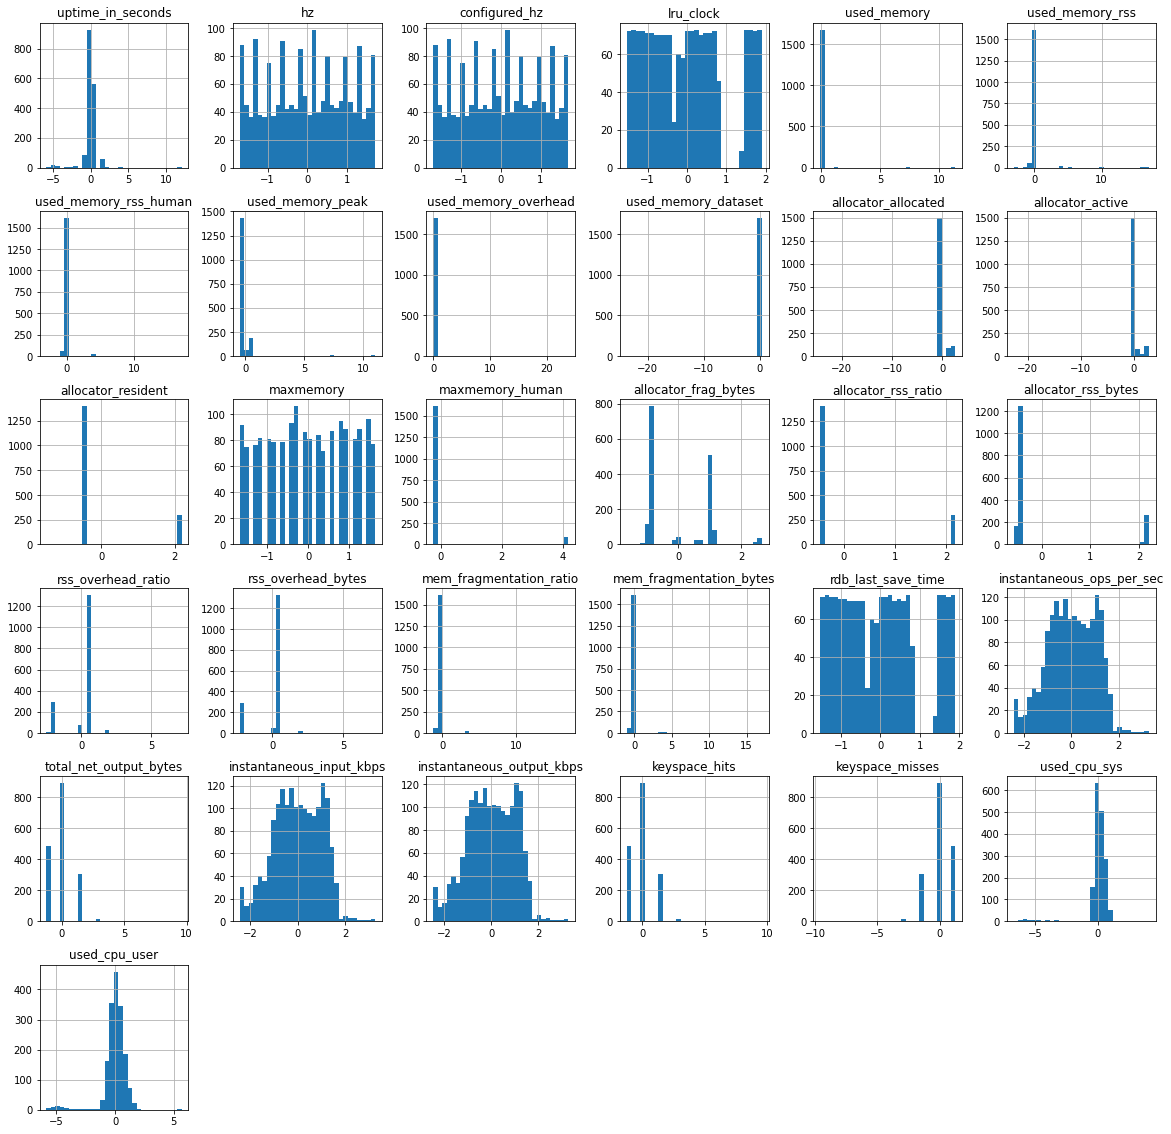

In [33]:
# 히스토그램으로 살펴보기
internalMetrics_df.hist(figsize=(20, 20), bins=30)

In [174]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [206]:
col = internalMetrics_df_drop.columns.tolist()
outlier_idx = []

# 컬럼별로 접근해서 인덱스 가져온다.
for col_name in col:
    idx = get_outlier(internalMetrics_df_drop, col_name)
    outlier_idx += list(idx)

outlier_idx = list(set(outlier_idx))  # 인데스 중복 삭제

# 인덱스 개수가 너무 많다. -> 몇개만 골라서 삭제하자
print(len(outlier_idx))

In [189]:
# internal unique 한 결과 이상치 하나 삭제하는게 낫다고 판단 
# uptime_in_seconds = [  22   21   23 3304   25   24   26   27]
for i in internalMetrics_df_drop:
    print(i)
    print(internalMetrics_df_drop[i].unique())

uptime_in_seconds
[  22   21   23 3304   25   24   26   27]
lru_clock
[1745211 1745245 1745272 ... 1823750 1823779 1823806]
used_memory_rss
[42033152 42037248 42029056 41828352 42045440 42049536 42057728 42020864
 42024960 42041344 42053632 42061824 41955328 42004480 41775104 42012672
 42016768 41779200 41926656 42000384 41799680 41836544 42008576 41963520
 41992192 41762816 42070016 41771008 42102784 41832448 41709568 41791488
 42098688 41820160 41766912 41996288 41889792 41910272 41840640 41988096
 41975808 41947136 41754624 41750528 41979904 41824256 41951232 41783296
 42094592 41938944 41730048 41738240 42106880 41967616 41934848 41844736
 41857024 41807872 41816064 42065920 42082304 41787392 42074112 41848832
 41803776 42086400 43388928 45441024 43397120 43466752 45490176 45461504
 45596672 43401216 45469696 43384832 47939584 47923200 47566848 45457408
 43442176 41922560 43409408 41943040 41877504 41865216 42110976 45473792
 45477888 43380736 43376640 43520000 43364352 43528192 43

<AxesSubplot:>

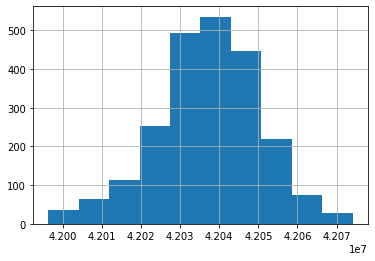

In [213]:
# used_memory_rss
used_memory_rss_idx = get_outlier(internalMetrics_df_drop, 'used_memory_rss')

internalMetrics_df_drop.drop(used_memory_rss_idx, axis=0)['used_memory_rss'].hist()

---

### 요인수 선택
* 요인 적재값
* 공통성
* 
* 클러스터링 개수 -> 각 클러스터마다 동등한 개수였으면 좋겠다

In [114]:
def factor_analysis(n_factors, df):
    fa = FactorAnalyzer(n_factors = n_factors, rotation='varimax')  # 객체 생성
    fa.fit(df)  # fitting
    df_fa = pd.DataFrame(fa.loadings_, index = df.columns)  # 데이터프레임으로 전달
    ev, v = fa.get_eigenvalues()
    return df_fa, ev

In [168]:
internalMetrics_fa, ev = factor_analysis(10, internalMetrics_df_drop)  ## 전체 데이터

# internalMetrics_df_drop = internalMetrics_normal_df
# internalMetrics_fa, ev = factor_analysis(6, internalMetrics_normal_df)  # 상관성 높은걸로 줄인거


In [169]:
# 요인수 선택 방법1 -> 요인수와 상관없다.
print(pd.DataFrame(ev))

               0
0   5.391834e+00
1   4.116692e+00
2   3.639592e+00
3   2.553513e+00
4   2.122341e+00
5   1.989631e+00
6   1.977722e+00
7   1.888623e+00
8   1.486744e+00
9   1.385225e+00
10  9.382039e-01
11  6.776351e-01
12  5.952317e-01
13  1.221306e-01
14  7.609938e-02
15  2.385941e-02
16  1.082325e-02
17  2.601862e-03
18  1.037238e-03
19  4.161843e-04
20  3.840516e-05
21  6.183569e-06
22  6.533230e-10
23  5.641300e-10
24  9.586959e-16
25  3.681587e-16
26 -2.148402e-17
27 -4.218910e-17
28 -2.922595e-15


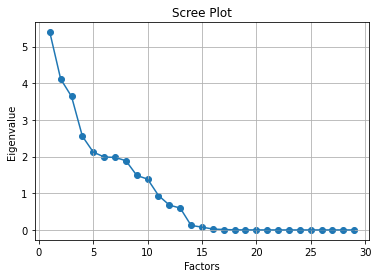

In [170]:
# 요인수 선택 방법2 -> 요인수와 상관없다
plt.scatter(range(1,internalMetrics_df_drop.shape[1]+1),ev)
plt.plot(range(1,internalMetrics_df_drop.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<AxesSubplot:>

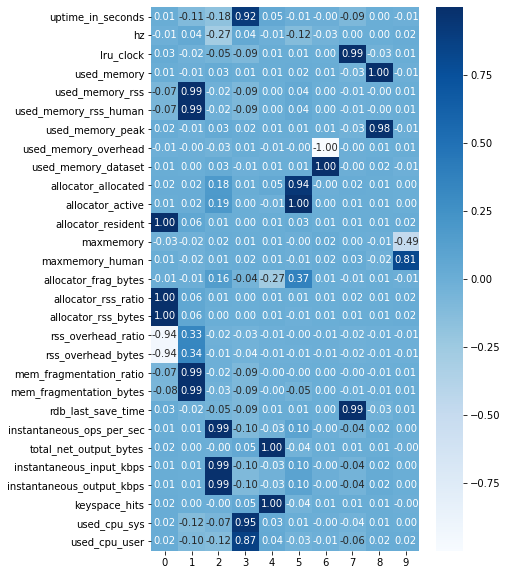

In [171]:
# 요인수 선택 방법3
# internal_metrics들이 포함되는 요인들 확인 -> 세로출이 거의다 포함되면 좋다.
plt.figure(figsize=(6,10))
sns.heatmap(internalMetrics_fa, cmap="Blues", annot=True, fmt='.2f')

---

## Clustering

In [172]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(internalMetrics_fa)

In [173]:
from sklearn.cluster import KMeans
def kmeans(n_clusters, df):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(df)
    
    df['cluster'] = kmeans.labels_
    
    return df

In [178]:
kmeans_df = kmeans(2, internalMetrics_fa)

In [179]:
# 클러스터 개수 확인 함수
def clusters(df):
    
    # 총 개수 확인
    print(df['cluster'].value_counts())
    print()
    
    count_cluster = len(df['cluster'].unique())
    new_df = pd.DataFrame()
    metric_list = []
    
    for i in range(count_cluster):
        metric_list = list(df[df['cluster'] == i].index)
        print("len = {}".format(len(df[df['cluster'] == i])))
        print("cluster{}".format(i))
        for metric in metric_list:
            print(metric)
        print()
        
    return new_df

In [180]:
df = clusters(kmeans_df)

1    23
0     6
Name: cluster, dtype: int64

len = 6
cluster0
used_memory_rss
used_memory_rss_human
rss_overhead_ratio
rss_overhead_bytes
mem_fragmentation_ratio
mem_fragmentation_bytes

len = 23
cluster1
uptime_in_seconds
hz
lru_clock
used_memory
used_memory_peak
used_memory_overhead
used_memory_dataset
allocator_allocated
allocator_active
allocator_resident
maxmemory
maxmemory_human
allocator_frag_bytes
allocator_rss_ratio
allocator_rss_bytes
rdb_last_save_time
instantaneous_ops_per_sec
total_net_output_bytes
instantaneous_input_kbps
instantaneous_output_kbps
keyspace_hits
used_cpu_sys
used_cpu_user



### Elbow

In [63]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

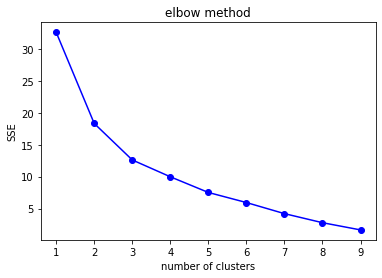

In [64]:
# 확 꺽이는 지점을 선택해야 한다. 
elbow(internalMetrics_fa, 10)

In [92]:
internalMetrics_fa.inertia_

AttributeError: 'DataFrame' object has no attribute 'inertia_'

In [93]:
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

In [94]:
visualize_silhouette_layer(internalMetrics_fa)

NameError: name 'silhouette_score' is not defined